<a href="https://colab.research.google.com/github/prat129/Dlithe_credit_card/blob/master/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card  Anamoly Detection**
__________________________________________________


## **1.1 Context**

This is to ensure credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

 This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. (***The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.***)

 We cannot provide the original features and more background information about the data due to confidentiality issues.Thus we can only make use of are 'Time' and 'Amount'.

i) Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

ii) The feature 'Amount' is the transaction Amount

iii)Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [32]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## **1.2 Exploratory analysis**

In [34]:
data.isnull().values.any()

False

We'll proceed as our data-set does not seem to have any null values

In [35]:
labels = ["Normal", "Fraud"] 

Text(0, 0.5, 'Frequency')

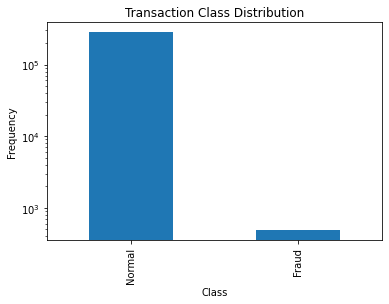

In [36]:
count_classes = pd.value_counts(data['Class'], sort = True) # we are sorting by frequencies

count_classes.plot(kind = 'bar',logy=True)

plt.title("Transaction Class Distribution")
plt.xticks(range(0,2),labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [37]:
## we are considering any 0's in the class as a normal case and any 1's as fraud cases

fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [38]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [39]:
#To analyze how different amounts are used in different classes  i.e in normal cases and those in fraudulant cases
fraud.Amount.describe() 

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [40]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

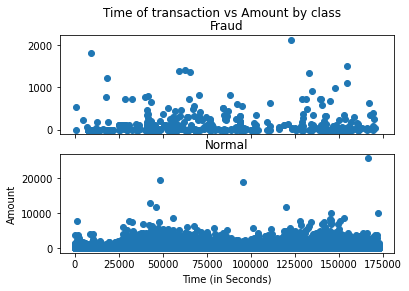

In [41]:
#We'll plot amounts of transactions vs time period to deduce whether fraud cases
#occurs incresingly during a period of time(just to get an idea,optional)

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.show()

In [42]:
## Let us take  some sample of the data
data1= data.sample(frac = 0.1,random_state=1)
data1.shape

(28481, 31)

In [43]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]

#taking the ratio of no of fraud cases to no of valid cases
fraction = len(Fraud)/float(len(Valid))

In [44]:
print(fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [45]:
#Create independent and Dependent Features
columns = data1.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we are predicting 
target = "Class"

# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)



# **1.3 Model Prediction**
we will be building the model now

The conventional model evaluation methods do not accurately measure model performance when faced with imbalanced datasets.

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.


In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,accuracy_score

# **Isolation Forest:**

 The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The following logic goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.The following is an implementation of isolation forest algorithm:


In [47]:
clf=IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=fraction,random_state=state, verbose=0)
clf.fit(X)
scores_prediction = clf.decision_function(X)
y_pred = clf.predict(X)

#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
# Run Classification Metrics

print("{}: {}".format(clf_name,n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))

print("Classification Report :")
print(classification_report(Y,y_pred))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481




**Observations**

*   So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%
*   accuracy score=99.7%,which implies suitability w.r.t highly imbalanced data set

